In [2]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [3]:
    "0x430c8c4a0a8f1c5a9de3576dcd153dd2b68c0d67",
    "0x3183ace137a96108292e58df284bbaaa6bca3b8a",
    "0x6d191737f9653a66d0e8236fff6e8ea543c05bc0",
    "0x8b1396f754b83afa1d06d273d5915d573b4f04ee",
    "0xf537776e58076ec7f50fe945c9384480816daa6d",
    "0x185737db359230898bf324d07de25160c71948b2",
    "0x1488bcfff8f7edd8286bf9549a76c8c7f10c829f",
    "0xfcbb6faac5f65ffe74e32ef4896b7ae5f5b35f0f",
    "0xa0b9faac81f34a849d57516a0193b37ec23e70b8",
    "0x1a5918dd41efcc34aba03c40b86242d10bc398fa",
    "0x1111e3ef0b6ae32e14a55e0e7cd9b8505177c2bf",
    "0xb16c60e0a93b73cd96bca5b0811715146b3f6fb4",
    "0x26a474cd0448b0d46487c811069b87a1f6d5dad6",
    "0xac411ce0f1a294544eee0922bfdfb64459301822",
    "0x89639b0c40b8517145d238df4a5a83247ebb66a5",
    "0x276bf434613bd8cb5c8b3282ec6445c9370e33fa",
    "0xd51ce9be4a1cb6185b76ba825c59236a6cf5ca2a",
    "0x3cfee83db8ddddc463c98d1224825a70de14a601",
    "0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497"

'0xb0bc44ca9ef6eb6f4eaac6807c9f6307f8136497'

In [54]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# Wallet addresses
wallet_addresses = [
"0x6ae04d64c0fd3bd5bae3150c763c7d7beb851c0d",
"0xedC6BacdC1e29D7c5FA6f6ECA6FDD447B9C487c9",
"0xabc74170f3Cb8Ab352820C39cC1d1e05cE9e41D3",
"0xfb9779477e5b4834bf2bc02dd29b97b344d0f700",
"0x8e8f818d3371f797a2db7edb32803607c8b3c6a9",
"0xe99bc90d3cb86cf095d75a020c10fbf9d4aa9a4d",
"0xd66570edcdade24edda902b28f2172e9ef8395dd",
"0x311d03143384cce04082800056a5f0c38f7f997b",
"0x032Ce235e0884Cd671E3D5B4B3983822A5F6740d",
"0x17b4051556118ed22424b9230725b08e4acd939f",
"0xa57e55ec968aaf937c4df7179cc884381b684c28",
"0xe97881a663a97b1fecbfe51a6318f2d53c7a49cd",
"0x4f3c217ea13940524ef2b11c4b0efecd117a9e37",
"0x008300082c3000009e63680088f8c7f4d3ff2e87",
"0x93793bd1f3e35a0efd098c30e486a860a0ef7551",
"0xc05f4c75465c6b1cfd4ffd1d8ce91c74a5563d5f",
"0x4f36327b71c99293d827d90d1b39e8a5aa672864",
"0x8b1396f754b83afa1d06d273d5915d573b4f04ee",
"0x8b1396f754b83afa1d06d273d5915d573b4f04ee"
]

# Etherscan API key
api_key = "5DSDMCYD46MENP7TZPUUDYBIDH1A2U6GB5"

# Define start and end block variables
start_block = 0  # Replace with the actual start block number
end_block = 999999999999  # Replace with the actual end block number

def get_token_transfers(wallet_address):
    url = f"https://api.etherscan.io/api"
    params = {
        "module": "account",
        "action": "tokentx",
        "address": wallet_address,
        "startblock": start_block,
        "endblock": end_block,
        "sort": "asc",
        "apikey": api_key,
    }
    response = requests.get(url, params=params)
    data = response.json()
    if data["status"] == "1":
        return data["result"]
    else:
        return []

# Pulling token transfer data for each wallet
all_token_transfers = []

for wallet in wallet_addresses:
    print(f"Pulling token transfers for wallet: {wallet}")
    token_transfers = get_token_transfers(wallet)
    all_token_transfers.extend(token_transfers)
    time.sleep(1)  # To avoid hitting rate limits

# Creating DataFrame from token transfers
df = pd.DataFrame(all_token_transfers)


Pulling token transfers for wallet: 0x6ae04d64c0fd3bd5bae3150c763c7d7beb851c0d
Pulling token transfers for wallet: 0xedC6BacdC1e29D7c5FA6f6ECA6FDD447B9C487c9
Pulling token transfers for wallet: 0xabc74170f3Cb8Ab352820C39cC1d1e05cE9e41D3
Pulling token transfers for wallet: 0xfb9779477e5b4834bf2bc02dd29b97b344d0f700
Pulling token transfers for wallet: 0x8e8f818d3371f797a2db7edb32803607c8b3c6a9
Pulling token transfers for wallet: 0xe99bc90d3cb86cf095d75a020c10fbf9d4aa9a4d
Pulling token transfers for wallet: 0xd66570edcdade24edda902b28f2172e9ef8395dd
Pulling token transfers for wallet: 0x311d03143384cce04082800056a5f0c38f7f997b
Pulling token transfers for wallet: 0x032Ce235e0884Cd671E3D5B4B3983822A5F6740d
Pulling token transfers for wallet: 0x17b4051556118ed22424b9230725b08e4acd939f
Pulling token transfers for wallet: 0xa57e55ec968aaf937c4df7179cc884381b684c28
Pulling token transfers for wallet: 0xe97881a663a97b1fecbfe51a6318f2d53c7a49cd
Pulling token transfers for wallet: 0x4f3c217ea13940

In [55]:
df

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,18479794,1698872351,0x0934c51b44ca7c589ac0073ebc7841c0ac2462365511...,1023571,0x311594ed63a9dc69c25de5746eaccb72a05d6d22bac8...,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xdac17f958d2ee523a2206206994597c13d831ec7,0x6ae04d64c0fd3bd5bae3150c763c7d7beb851c0d,74974883,Tether USD,USDT,6,107,2000000,51860172670,385605,10512411,deprecated,2858091
1,13191681,1631192623,0x66e67909a32c02e904867704bd7a0a7ee78739594d38...,91996,0x498c44b505b6f8e0a361ce9ff6829a48c88707946ca3...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0xdac17f958d2ee523a2206206994597c13d831ec7,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000,Tether USD,USDT,6,200,250000,141741969029,63197,23704548,deprecated,8146204
2,13191683,1631192664,0xd56245f308b30a911dc7584a6f8c5d2e6ee6ce8817e9...,91997,0x7581df66f98c5760e81c3fd283301818b512783b5a89...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000000000000000,ELF,ELF,18,44,250000,155624912859,54452,2719870,deprecated,8146202
3,13191687,1631192681,0xd72295d4e1dc94d77663a41cc423b1576a9033f41488...,91998,0x214403d5dc11886544879dbb73addd113a52b1b97111...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0x6c6ee5e31d828de241282b9606c8e98ea48526e2,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000000000000000,HoloToken,HOT,18,63,250000,137591603647,54417,3085716,deprecated,8146198
4,13191688,1631192698,0xfa8f45b31a432daf31c72a3b2ddfd280e51c98b0ad25...,91999,0x4cc1a0762a294f27a81a49faac233630cb072dc97f76...,0x95b564f3b3bae3f206aa418667ba000afafacc8a,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,1000000000000000000,StatusNetwork,SNT,18,175,250000,121993521393,119675,12315818,deprecated,8146197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29745,21332642,1733357579,0x1bf8fa53098286c2525ea118b33351e4b9b6eda0a17f...,359,0xb6cfa51f7a92d02c8989feb44ad08866977b0e64fca4...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,36500000000000000000,Nvidia AI,NVIDIA AI,8,100,276131,23125891036,272799,10018450,deprecated,5246
29746,21332648,1733357663,0x99bf841e2952fc17ee422384de73a72f6a1b32d67d8b...,361,0x3171caa095a9db043f9264d3741f31f04b547baeaccb...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,86500000000000000000,Tesla AI,TESLA AI,8,101,466135,23429235443,461307,10344939,deprecated,5240
29747,21332963,1733361479,0x78699b434693d6d9ebec564cadb03687194743460ee8...,362,0xf6805cb980ff8e4828a0ad1c93ac2e2a3c6491c4f023...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,53500000000000000000,Tesla AI,TESLA AI,8,149,710933,20740241784,704177,11688898,deprecated,4925
29748,21334806,1733383751,0xa804cf63e51915948e2471c0742cd67aa60819cede2a...,373,0x471538c7ca832fef9fe50cc2a8e8dbfc033c457fdd8e...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,66866550000000000000,Nvidia AI,NVIDIA AI,8,229,995879,14765461329,986879,20201138,deprecated,3082


In [56]:
# Ensure we only keep necessary columns
df = df[["timeStamp", "hash", "from", "contractAddress", "to",  "tokenName", "tokenSymbol", "value"]]
df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')

# Define seven_days_ago variable
seven_days_ago = pd.Timestamp.now() - pd.Timedelta(days=7)

# Filtering token transactions within the past 1 days
df = df[df["timeStamp"] >= seven_days_ago]

/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_73931/3816293258.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_73931/3816293258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timeStamp"] = pd.to_datetime(df["timeStamp"], unit='s')


In [57]:
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value
7649,2024-11-28 15:08:48,0x582629f26b088a43c651dc9a88aae9f5befb119dc6c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x80c62fe4487e1351b47ba49809ebd60ed085bf52,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Clover,CLV,3800000000000000000000000
7650,2024-11-28 15:10:56,0x5ec2790bc316cad7c2c92c8058e199612553190c248e...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xe53ec727dbdeb9e2d5456c3be40cff031ab40a55,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SuperVerse,SUPER,240000000000000000000000
7651,2024-11-28 15:38:40,0x192a53111cc2655fb30b9f87baa42338ae75db7c3264...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xa62cc35625b0c8dc1faea39d33625bb4c15bd71c,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StormX,STMX,8000000000000000000000000
7652,2024-11-28 18:29:20,0x2f32f10d6bb53e0485e9f546b64ad7708126c83be29a...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0xbe0ed4138121ecfc5c0e56b40517da27e6c5226b,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Aethir Token,ATH,14638473810000000000000000
7653,2024-11-28 21:09:20,0x171d72aa0a454232b860c1242b6f003fc4ebddf74dc7...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StatusNetwork,SNT,800000000000000000000000
...,...,...,...,...,...,...,...,...
29745,2024-12-05 00:12:48,0x1bf8fa53098286c2525ea118b33351e4b9b6eda0a17f...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,36500000000000000000
29746,2024-12-05 00:14:56,0x99bf841e2952fc17ee422384de73a72f6a1b32d67d8b...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,86500000000000000000
29747,2024-12-05 01:18:56,0x78699b434693d6d9ebec564cadb03687194743460ee8...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,53500000000000000000
29748,2024-12-05 07:30:08,0xa804cf63e51915948e2471c0742cd67aa60819cede2a...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,66866550000000000000


In [58]:
api_columns = [
    "price",  "price5m", "variation5m", 
    "price1h", "variation1h", 
    "price6h", "variation6h", 
    "price24h", "variation24h"
]

# Set up API request
headers = {
    "accept": "application/json",
    "x-api-key": "uo9IKArCoh5aH9tNo3OBj6JwaQhjuuFLaWxLNuOW"
}

def get_token_data(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/price"
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        if 'data' in data and data['data']:
            # Extract only the specified metrics
            token_data = {col: data['data'].get(col, None) for col in api_columns}
            # Check if any data is missing and log it
            missing_data = [col for col, value in token_data.items() if value is None]
            if missing_data:
                print(f"Missing data for {contract_address}: {missing_data}")
            return token_data
        else:
            print(f"No data returned for {contract_address}. Response content: {data}")
            return {col: None for col in api_columns}
            
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {contract_address}: {e}")
        return {col: None for col in api_columns}
    
    # Add rate limiting
    time.sleep(1)

# Process each unique contract in the DataFrame
unique_contracts = df['contractAddress'].str.lower().unique()
for contract in unique_contracts:
    token_data = get_token_data(contract)
    
    # Update DataFrame with token data
    for col, value in token_data.items():
        df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value

# Convert columns to numeric
for col in [f'dextools_{c}' for c in api_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Missing data for 0x80c62fe4487e1351b47ba49809ebd60ed085bf52: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h']
Missing data for 0xa62cc35625b0c8dc1faea39d33625bb4c15bd71c: ['price5m', 'variation5m']
Error fetching data for 0xbe0ed4138121ecfc5c0e56b40517da27e6c5226b: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0xbe0ed4138121ecfc5c0e56b40517da27e6c5226b/price
Error fetching data for 0x744d70fdbe2ba4cf95131626614a1763df805b9e: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x744d70fdbe2ba4cf95131626614a1763df805b9e/price
Error fetching data for 0xd3aef756e77ff56d2efcdc8bbb84674038da42ac: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0xd3aef756e77ff56d2efcdc8bbb84674038da42ac/price
Error fetching data for 0x55d0c027569318f819e81718e484862e6556766a: 429 Client Error: Too Many Requests for url: https://public-ap

In [59]:
# Define the columns we want to capture from the info API endpoint
info_columns = [
    "circulatingSupply", "totalSupply", "mcap", "fdv", "holders"
]

def get_token_info(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/info"
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        if 'data' in data and data['data']:
            # Extract only the specified metrics
            token_info = {col: data['data'].get(col, None) for col in info_columns}
            # Check if any data is missing and log it
            missing_data = [col for col, value in token_info.items() if value is None]
            if missing_data:
                print(f"Missing info data for {contract_address}: {missing_data}")
            return token_info
        else:
            print(f"No info data returned for {contract_address}. Response content: {data}")
            return {col: None for col in info_columns}
            
    except requests.exceptions.RequestException as e:
        print(f"Error fetching info data for {contract_address}: {e}")
        return {col: None for col in info_columns}
    
    # Add rate limiting
    time.sleep(1)

# Process each unique contract in the DataFrame
unique_contracts = df['contractAddress'].str.lower().unique()
for contract in unique_contracts:
    token_info = get_token_info(contract)
    
    # Update DataFrame with token info
    for col, value in token_info.items():
        df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value

# Convert columns to numeric
for col in [f'dextools_{c}' for c in info_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Missing info data for 0xd3aef756e77ff56d2efcdc8bbb84674038da42ac: ['circulatingSupply', 'mcap']
Missing info data for 0x55d0c027569318f819e81718e484862e6556766a: ['circulatingSupply', 'mcap']
Missing info data for 0x37843bc944edbb0477df943d9061d359004a4e70: ['circulatingSupply', 'mcap']
Missing info data for 0xdba22db98d9651e7d11b811476b0c7c563d7ff84: ['circulatingSupply', 'mcap']
Error fetching info data for 0x36c224af80207ecaba3ee9052faaba56d1f50c18: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x36c224af80207ecaba3ee9052faaba56d1f50c18/info
Error fetching info data for 0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783/info
Error fetching info data for 0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b: 429 Client Error: Too Many Requests for url: https://public-api.dextools.io/trial/v2/token/ether/0xc7e8c1ff

In [60]:
def get_token_info(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/info"
    
    try:
        # Add exponential backoff retry logic
        max_retries = 3
        retry_delay = 5  # Start with 5 seconds
        
        for attempt in range(max_retries):
            response = requests.get(url, headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and data['data']:
                    token_info = {col: data['data'].get(col, None) for col in info_columns}
                    return token_info
                else:
                    print(f"No info data returned for {contract_address}")
                    return {col: None for col in info_columns}
            
            elif response.status_code == 429:  # Too Many Requests
                if attempt < max_retries - 1:  # Don't sleep on last attempt
                    sleep_time = retry_delay * (2 ** attempt)  # Exponential backoff
                    print(f"Rate limit hit, waiting {sleep_time} seconds...")
                    time.sleep(sleep_time)
                    continue
            
            else:
                print(f"Error {response.status_code} for {contract_address}")
                return {col: None for col in info_columns}
                
    except requests.exceptions.RequestException as e:
        print(f"Error fetching info data for {contract_address}: {e}")
        return {col: None for col in info_columns}
    
    # Add longer delay between successful requests
    time.sleep(2)

# Process contracts in smaller batches
batch_size = 5
for i in range(0, len(unique_contracts), batch_size):
    batch = unique_contracts[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{len(unique_contracts)//batch_size + 1}")
    
    for contract in batch:
        token_info = get_token_info(contract)
        
        # Update DataFrame with token info
        for col, value in token_info.items():
            df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value
    
    # Add delay between batches
    time.sleep(10)  # Wait 10 seconds between batches

Processing batch 1/13
Processing batch 2/13
Processing batch 3/13
Processing batch 4/13
Processing batch 5/13
Processing batch 6/13
Processing batch 7/13
Processing batch 8/13
Processing batch 9/13
Processing batch 10/13
Processing batch 11/13
Processing batch 12/13
Processing batch 13/13


In [61]:
def get_token_data(contract_address):
    url = f"https://public-api.dextools.io/trial/v2/token/ether/{contract_address}/price"
    
    try:
        # Add exponential backoff retry logic
        max_retries = 3
        retry_delay = 5  # Start with 5 seconds
        
        for attempt in range(max_retries):
            response = requests.get(url, headers=headers)
            
            if response.status_code == 200:
                data = response.json()
                if 'data' in data and data['data']:
                    # Extract only the specified metrics
                    token_data = {col: data['data'].get(col, None) for col in api_columns}
                    # Check if any data is missing and log it
                    missing_data = [col for col, value in token_data.items() if value is None]
                    if missing_data:
                        print(f"Missing data for {contract_address}: {missing_data}")
                    return token_data
                else:
                    print(f"No data returned for {contract_address}")
                    return {col: None for col in api_columns}
            
            elif response.status_code == 429:  # Too Many Requests
                if attempt < max_retries - 1:  # Don't sleep on last attempt
                    sleep_time = retry_delay * (2 ** attempt)  # Exponential backoff
                    print(f"Rate limit hit, waiting {sleep_time} seconds...")
                    time.sleep(sleep_time)
                    continue
            
            else:
                print(f"Error {response.status_code} for {contract_address}")
                return {col: None for col in api_columns}
                
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {contract_address}: {e}")
        return {col: None for col in api_columns}
    
    # Add longer delay between successful requests
    time.sleep(2)

# Process contracts in smaller batches
batch_size = 5
unique_contracts = df['contractAddress'].str.lower().unique()

for i in range(0, len(unique_contracts), batch_size):
    batch = unique_contracts[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{len(unique_contracts)//batch_size + 1}")
    
    for contract in batch:
        token_data = get_token_data(contract)
        
        # Update DataFrame with token data
        for col, value in token_data.items():
            df.loc[df['contractAddress'].str.lower() == contract, f'dextools_{col}'] = value
    
    # Add delay between batches
    time.sleep(10)  # Wait 10 seconds between batches

# Convert columns to numeric
for col in [f'dextools_{c}' for c in api_columns]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Processing batch 1/13
Missing data for 0x80c62fe4487e1351b47ba49809ebd60ed085bf52: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h']
Missing data for 0xe53ec727dbdeb9e2d5456c3be40cff031ab40a55: ['price5m', 'variation5m']
Rate limit hit, waiting 5 seconds...
Missing data for 0x744d70fdbe2ba4cf95131626614a1763df805b9e: ['price5m', 'variation5m']
Processing batch 2/13
Missing data for 0xd3aef756e77ff56d2efcdc8bbb84674038da42ac: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h', 'price24h', 'variation24h']
Missing data for 0x55d0c027569318f819e81718e484862e6556766a: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h', 'price24h', 'variation24h']
Missing data for 0x37843bc944edbb0477df943d9061d359004a4e70: ['price5m', 'variation5m', 'price1h', 'variation1h', 'price6h', 'variation6h']
Missing data for 0xdba22db98d9651e7d11b811476b0c7c563d7ff84: ['price5m', 'variation5m', 'price6h', 'variation6h']
Missing data 

Columns in DataFrame: ['timeStamp', 'hash', 'from', 'contractAddress', 'to', 'tokenName', 'tokenSymbol', 'value', 'dextools_price', 'dextools_price5m', 'dextools_variation5m', 'dextools_price1h', 'dextools_variation1h', 'dextools_price6h', 'dextools_variation6h', 'dextools_price24h', 'dextools_variation24h', 'dextools_circulatingSupply', 'dextools_totalSupply', 'dextools_mcap', 'dextools_fdv', 'dextools_holders']

Sample of numeric columns:
                           timeStamp  dextools_price  dextools_price5m  \
count                            770    7.700000e+02        207.000000   
mean   2024-11-30 23:59:47.033766144    5.728102e+28          2.164254   
min              2024-11-28 12:58:40    1.819453e-09          0.000022   
25%              2024-11-29 04:20:16    8.821868e-04          0.033104   
50%              2024-11-30 10:03:44    9.167329e-03          0.297373   
75%              2024-12-02 02:24:00    7.881724e-02          0.297373   
max              2024-12-05 17:42:24 

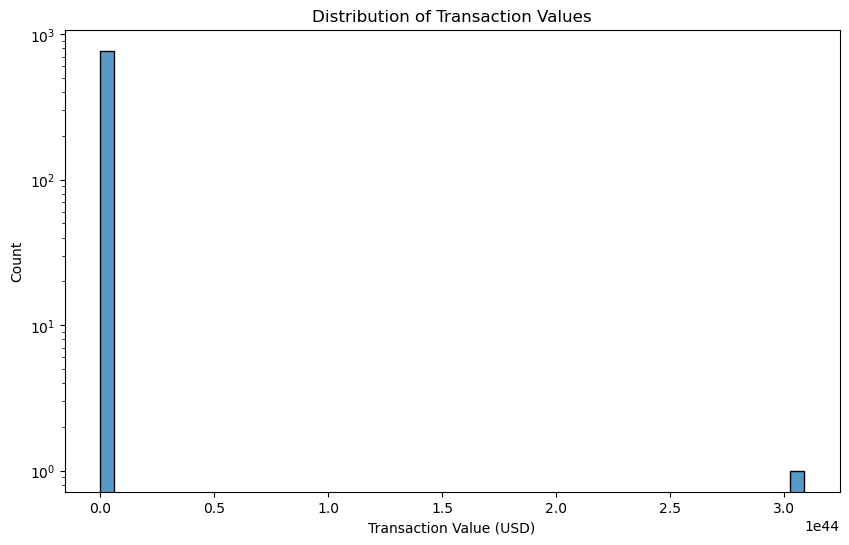

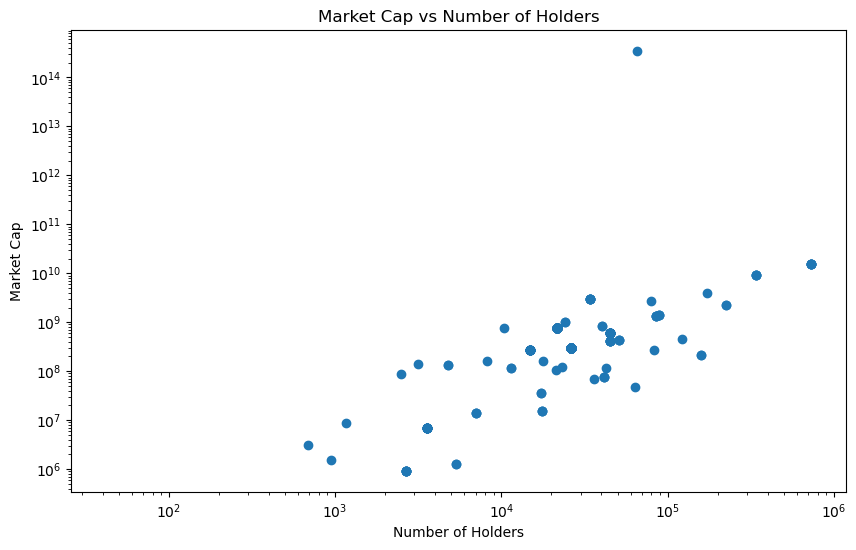

In [62]:
# 1. First, let's check what data we have
print("Columns in DataFrame:", df.columns.tolist())
print("\nSample of numeric columns:")
print(df.describe())

# 2. Clean up any remaining NaN values
df = df.fillna(0)

# 3. Add some useful derived metrics
df['transaction_value_usd'] = df['value'].astype(float) * df['dextools_price']
df['market_cap_millions'] = df['dextools_mcap'] / 1_000_000

# 4. Create a summary of tokens
token_summary = df.groupby(['tokenSymbol', 'contractAddress']).agg({
    'dextools_price': 'last',
    'dextools_mcap': 'last',
    'dextools_holders': 'last',
    'transaction_value_usd': ['count', 'sum', 'mean']
}).round(2)

print("\nToken Summary:")
print(token_summary)

# 5. Save the enriched data
df.to_csv('enriched_token_data.csv', index=False)
token_summary.to_csv('token_summary.csv')

# 6. Optional: Create some visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Transaction value distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='transaction_value_usd', bins=50)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.yscale('log')
plt.show()

# Market Cap vs Holders scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['dextools_holders'], df['dextools_mcap'])
plt.xlabel('Number of Holders')
plt.ylabel('Market Cap')
plt.title('Market Cap vs Number of Holders')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [63]:
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_price,dextools_price5m,...,dextools_variation6h,dextools_price24h,dextools_variation24h,dextools_circulatingSupply,dextools_totalSupply,dextools_mcap,dextools_fdv,dextools_holders,transaction_value_usd,market_cap_millions
7649,2024-11-28 15:08:48,0x582629f26b088a43c651dc9a88aae9f5befb119dc6c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x80c62fe4487e1351b47ba49809ebd60ed085bf52,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Clover,CLV,3800000000000000000000000,0.126218,0.000000,...,0.000000,0.106352,18.679720,1.200000e+08,1.000000e+09,1.514620e+07,1.262183e+08,17671.0,4.796297e+23,15.146200
7650,2024-11-28 15:10:56,0x5ec2790bc316cad7c2c92c8058e199612553190c248e...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xe53ec727dbdeb9e2d5456c3be40cff031ab40a55,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SuperVerse,SUPER,240000000000000000000000,1.745558,0.000000,...,-2.409743,1.624130,7.476461,4.879761e+08,9.999981e+08,8.517904e+08,1.745554e+09,40459.0,4.189338e+23,851.790371
7651,2024-11-28 15:38:40,0x192a53111cc2655fb30b9f87baa42338ae75db7c3264...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xa62cc35625b0c8dc1faea39d33625bb4c15bd71c,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StormX,STMX,8000000000000000000000000,0.008827,0.007707,...,-0.379260,0.007881,12.007352,1.231841e+10,1.250000e+10,1.059101e+08,1.074714e+08,0.0,7.061453e+22,105.910065
7652,2024-11-28 18:29:20,0x2f32f10d6bb53e0485e9f546b64ad7708126c83be29a...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0xbe0ed4138121ecfc5c0e56b40517da27e6c5226b,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Aethir Token,ATH,14638473810000000000000000,0.079256,0.079256,...,5.918223,0.072449,9.395056,5.217818e+09,4.200000e+10,4.135440e+08,3.328757e+09,45172.0,1.160189e+24,413.544035
7653,2024-11-28 21:09:20,0x171d72aa0a454232b860c1242b6f003fc4ebddf74dc7...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StatusNetwork,SNT,800000000000000000000000,0.069089,0.000000,...,-2.897060,0.068820,0.390742,3.996915e+09,6.804870e+09,2.761417e+08,4.701398e+08,82670.0,5.527098e+22,276.141727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29745,2024-12-05 00:12:48,0x1bf8fa53098286c2525ea118b33351e4b9b6eda0a17f...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,36500000000000000000,0.009167,0.000000,...,0.007888,0.006939,32.122045,0.000000e+00,1.000000e+09,0.000000e+00,9.167329e+06,67.0,3.346075e+17,0.000000
29746,2024-12-05 00:14:56,0x99bf841e2952fc17ee422384de73a72f6a1b32d67d8b...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,86500000000000000000,0.021055,0.000000,...,0.000000,0.017600,19.629760,0.000000e+00,1.000000e+09,0.000000e+00,2.105473e+07,73.0,1.821234e+18,0.000000
29747,2024-12-05 01:18:56,0x78699b434693d6d9ebec564cadb03687194743460ee8...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,53500000000000000000,0.021055,0.000000,...,0.000000,0.017600,19.629760,0.000000e+00,1.000000e+09,0.000000e+00,2.105473e+07,73.0,1.126428e+18,0.000000
29748,2024-12-05 07:30:08,0xa804cf63e51915948e2471c0742cd67aa60819cede2a...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,66866550000000000000,0.009167,0.000000,...,0.007888,0.006939,32.122045,0.000000e+00,1.000000e+09,0.000000e+00,9.167329e+06,67.0,6.129877e+17,0.000000


In [64]:
print(df.iloc[80])

timeStamp                                                   2024-12-03 12:43:44
hash                          0x4d95cc89f8e413a0fb50514f8128ac3f13e82fd9510c...
from                                 0xb2170202b050f0549b9d9733f8258bc917346f98
contractAddress                      0x6982508145454ce325ddbe47a25d4ec3d2311933
to                                   0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9
tokenName                                                                  Pepe
tokenSymbol                                                                PEPE
value                                             45308077031390000000000000000
dextools_price                                                         0.000022
dextools_price5m                                                       0.000022
dextools_variation5m                                                  -0.001837
dextools_price1h                                                       0.000022
dextools_variation1h                    

In [65]:
df = df[df["value"].astype(float) > 0]
df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_price,dextools_price5m,...,dextools_variation6h,dextools_price24h,dextools_variation24h,dextools_circulatingSupply,dextools_totalSupply,dextools_mcap,dextools_fdv,dextools_holders,transaction_value_usd,market_cap_millions
7649,2024-11-28 15:08:48,0x582629f26b088a43c651dc9a88aae9f5befb119dc6c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x80c62fe4487e1351b47ba49809ebd60ed085bf52,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Clover,CLV,3800000000000000000000000,0.126218,0.000000,...,0.000000,0.106352,18.679720,1.200000e+08,1.000000e+09,1.514620e+07,1.262183e+08,17671.0,4.796297e+23,15.146200
7650,2024-11-28 15:10:56,0x5ec2790bc316cad7c2c92c8058e199612553190c248e...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xe53ec727dbdeb9e2d5456c3be40cff031ab40a55,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SuperVerse,SUPER,240000000000000000000000,1.745558,0.000000,...,-2.409743,1.624130,7.476461,4.879761e+08,9.999981e+08,8.517904e+08,1.745554e+09,40459.0,4.189338e+23,851.790371
7651,2024-11-28 15:38:40,0x192a53111cc2655fb30b9f87baa42338ae75db7c3264...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xa62cc35625b0c8dc1faea39d33625bb4c15bd71c,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StormX,STMX,8000000000000000000000000,0.008827,0.007707,...,-0.379260,0.007881,12.007352,1.231841e+10,1.250000e+10,1.059101e+08,1.074714e+08,0.0,7.061453e+22,105.910065
7652,2024-11-28 18:29:20,0x2f32f10d6bb53e0485e9f546b64ad7708126c83be29a...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0xbe0ed4138121ecfc5c0e56b40517da27e6c5226b,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Aethir Token,ATH,14638473810000000000000000,0.079256,0.079256,...,5.918223,0.072449,9.395056,5.217818e+09,4.200000e+10,4.135440e+08,3.328757e+09,45172.0,1.160189e+24,413.544035
7653,2024-11-28 21:09:20,0x171d72aa0a454232b860c1242b6f003fc4ebddf74dc7...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StatusNetwork,SNT,800000000000000000000000,0.069089,0.000000,...,-2.897060,0.068820,0.390742,3.996915e+09,6.804870e+09,2.761417e+08,4.701398e+08,82670.0,5.527098e+22,276.141727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29745,2024-12-05 00:12:48,0x1bf8fa53098286c2525ea118b33351e4b9b6eda0a17f...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,36500000000000000000,0.009167,0.000000,...,0.007888,0.006939,32.122045,0.000000e+00,1.000000e+09,0.000000e+00,9.167329e+06,67.0,3.346075e+17,0.000000
29746,2024-12-05 00:14:56,0x99bf841e2952fc17ee422384de73a72f6a1b32d67d8b...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,86500000000000000000,0.021055,0.000000,...,0.000000,0.017600,19.629760,0.000000e+00,1.000000e+09,0.000000e+00,2.105473e+07,73.0,1.821234e+18,0.000000
29747,2024-12-05 01:18:56,0x78699b434693d6d9ebec564cadb03687194743460ee8...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,53500000000000000000,0.021055,0.000000,...,0.000000,0.017600,19.629760,0.000000e+00,1.000000e+09,0.000000e+00,2.105473e+07,73.0,1.126428e+18,0.000000
29748,2024-12-05 07:30:08,0xa804cf63e51915948e2471c0742cd67aa60819cede2a...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,66866550000000000000,0.009167,0.000000,...,0.007888,0.006939,32.122045,0.000000e+00,1.000000e+09,0.000000e+00,9.167329e+06,67.0,6.129877e+17,0.000000


In [66]:
df.to_csv('token_dataframe.csv', index=False)